In [2]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [59]:
import datetime as dt

In [63]:
# Had to pass the first line as there was an error. Ideally it should work without calling it
pd.core.common.is_list_like = pd.api.types.is_list_like
import pandas_datareader as pdr
import pandas_datareader.data as web

In [64]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [79]:
end = datetime.now()
start = datetime(end.year-1, end.month, end.day)

In [113]:
# globals() is called to define each of the stocks individually
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'iex', start, end)

2y
2y
2y
2y


In [114]:
AAPL.head()

,open,high,low,close,volume
date,,,,,
2017-09-27,151.5091,152.4143,151.2530,151.9327,25504227
2017-09-28,151.5978,151.9820,150.4255,150.9969,22005455
2017-09-29,150.9279,151.8342,149.7359,151.8244,26299810
2017-10-02,151.9623,152.1494,150.4452,151.5190,18698842
2017-10-03,151.7160,152.7799,151.6175,152.1790,16230293


In [92]:
AAPL.describe()

,open,high,low,close,volume
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,180.257239,181.811734,178.903694,180.396296,2.994420e+07
std,19.085065,19.250576,18.999309,19.131197,1.295427e+07
min,150.927900,151.568200,149.139900,150.996900,1.251979e+07
25%,168.460400,169.913650,166.895800,167.869525,2.094583e+07
50%,173.949350,175.425850,172.934300,174.315950,2.636431e+07
75%,189.041950,190.643875,188.563625,189.639850,3.531207e+07
max,228.990000,229.670000,226.630000,228.360000,9.624675e+07


In [118]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
Index: 252 entries, 2017-09-27 to 2018-09-26
Data columns (total 5 columns):
open      252 non-null float64
high      252 non-null float64
low       252 non-null float64
close     252 non-null float64
volume    252 non-null int64
dtypes: float64(4), int64(1)
memory usage: 11.8+ KB


In [137]:
date = AAPL.index.values

Text(0,0.5,'Closing Price(USD)')

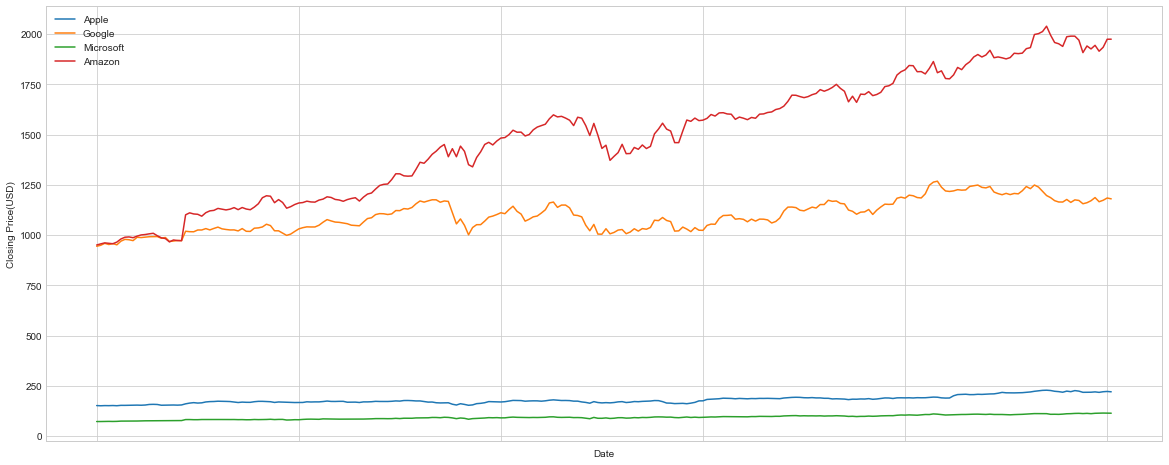

In [152]:
AAPL['close'].plot(legend=True, figsize=(20,8), label='Apple')
GOOG['close'].plot(legend=True, figsize=(20,8), label='Google')
MSFT['close'].plot(legend=True, figsize=(20,8), label='Microsoft')
AMZN['close'].plot(legend=True, figsize=(20,8), label='Amazon')
plt.xlabel('Date')
plt.ylabel('Closing Price(USD)')

# Price of amazon has skyrocketed in the past year going up by more than 100%

Text(0,0.5,'Volume')

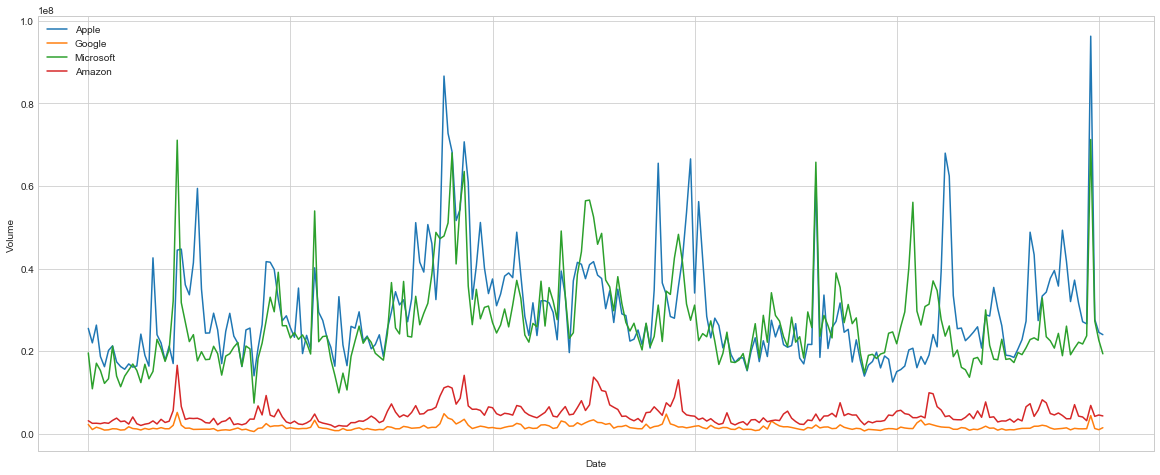

In [156]:
AAPL['volume'].plot(legend=True, figsize=(20,8), label='Apple')
GOOG['volume'].plot(legend=True, figsize=(20,8), label='Google')
MSFT['volume'].plot(legend=True, figsize=(20,8), label='Microsoft')
AMZN['volume'].plot(legend=True, figsize=(20,8), label='Amazon')
plt.xlabel('Date')
plt.ylabel('Volume')

# This plot shows a different story. 
# The high price of amazon and google is due to the fact that the publically traded shares are much lower in number

In [176]:
# To calculate moving average

ma_days = [20, 50]

for ma in ma_days:
    
    column_name = "MA for %s days" %(str(ma))
    
    AAPL[column_name] = DataFrame.rolling(AAPL['close'],ma).mean()

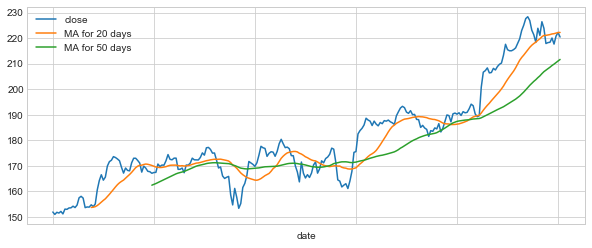

In [178]:
AAPL[['close', 'MA for 20 days', 'MA for 50 days']].plot(subplots=False, figsize=(10,4))

In [179]:
AAPL['Daily Return'] = AAPL['close'].pct_change()

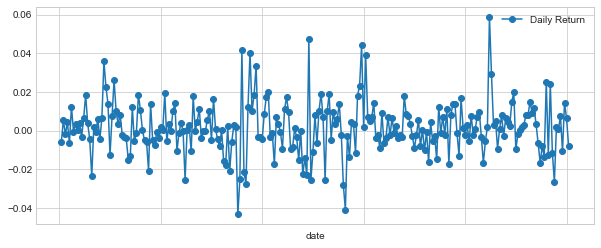

In [182]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, marker='o')

# This gives the fluctuations in daily returns

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


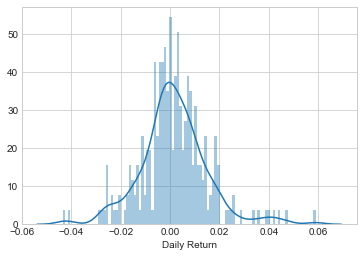

In [184]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100)

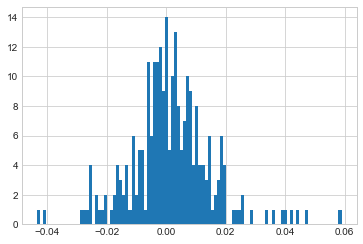

In [185]:
AAPL['Daily Return'].hist(bins=100)

# Notice that the labelling of y-axis and in sns plot

In [216]:
# Now to compare all the stocks, we have to create a new database with closing prices of all
# Ideally closing_df = web.DataReader(tech_list, 'iex', start, end)['close'] should have worked but it didn't
# I created the database manually, notice that the date automatically appeared

closing_df = DataFrame({'Apple': AAPL['close'], 'Amazon': AMZN['close'], 'Google': GOOG['close'], 'Microsoft': MSFT['close']})

In [218]:
closing_df.head()

,Apple,Amazon,Google,Microsoft
date,,,,
2017-09-27,151.9327,950.87,944.49,72.5426
2017-09-28,150.9969,956.40,949.50,72.5622
2017-09-29,151.8244,961.35,959.11,73.1713
2017-10-02,151.5190,959.19,953.27,73.2891
2017-10-03,152.1790,957.10,957.79,72.9453


In [219]:
# To calculate percentage change for all companies' stocks
# Note this applies % change to all columns
st_ret = closing_df.pct_change()

In [220]:
st_ret.head()

,Apple,Amazon,Google,Microsoft
date,,,,
2017-09-27,NaN,NaN,NaN,NaN
2017-09-28,-0.006159,0.005816,0.005304,0.000270
2017-09-29,0.005480,0.005176,0.010121,0.008394
2017-10-02,-0.002012,-0.002247,-0.006089,0.001610
2017-10-03,0.004356,-0.002179,0.004742,-0.004691


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


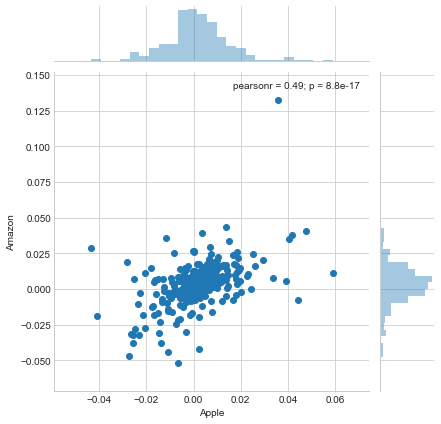

In [236]:
sns.jointplot('Apple', 'Amazon', data=st_ret, kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


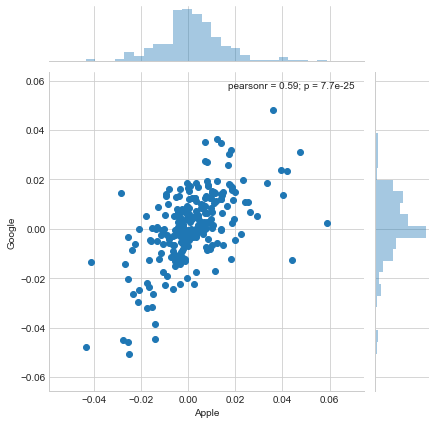

In [237]:
sns.jointplot('Apple', 'Google', data=st_ret, kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


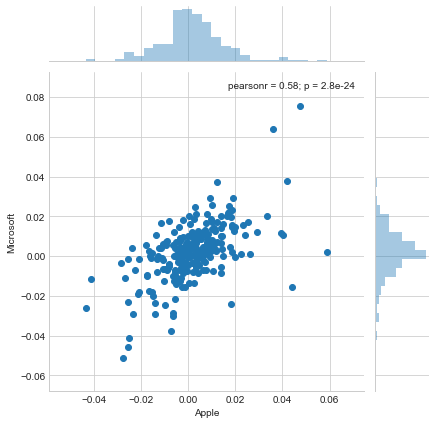

In [238]:
sns.jointplot('Apple', 'Microsoft', data=st_ret, kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


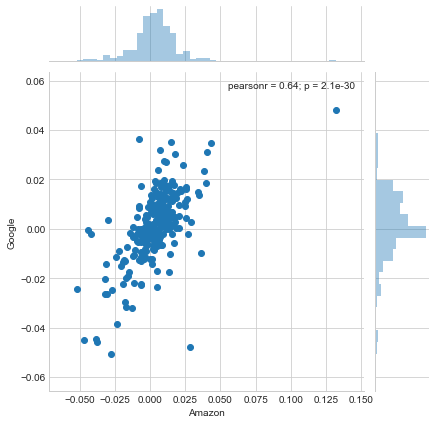

In [239]:
sns.jointplot('Amazon', 'Google', data=st_ret, kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


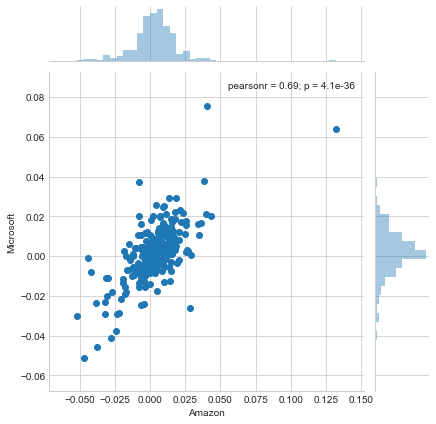

In [248]:
sns.jointplot('Amazon', 'Microsoft', data=st_ret, kind='scatter')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


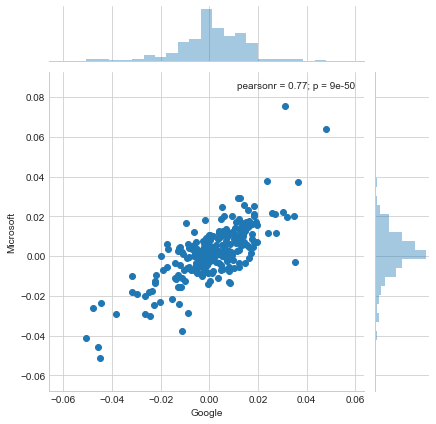

In [249]:
sns.jointplot('Google', 'Microsoft', data=st_ret, kind='scatter')

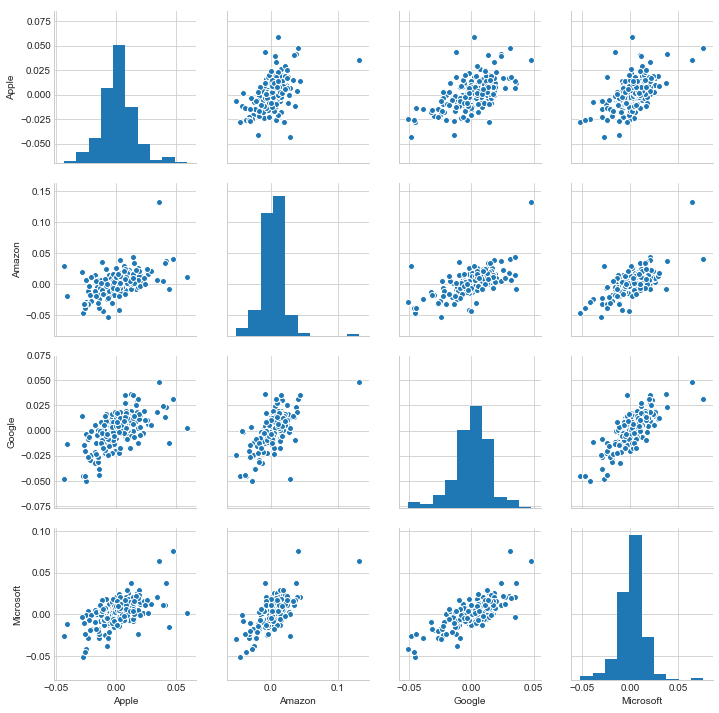

In [247]:
# Histogram here shows daily return percentage of stock
# Scatter here shows the correlation
sns.pairplot(st_ret.dropna())

# Google and microsoft are highly correlated

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


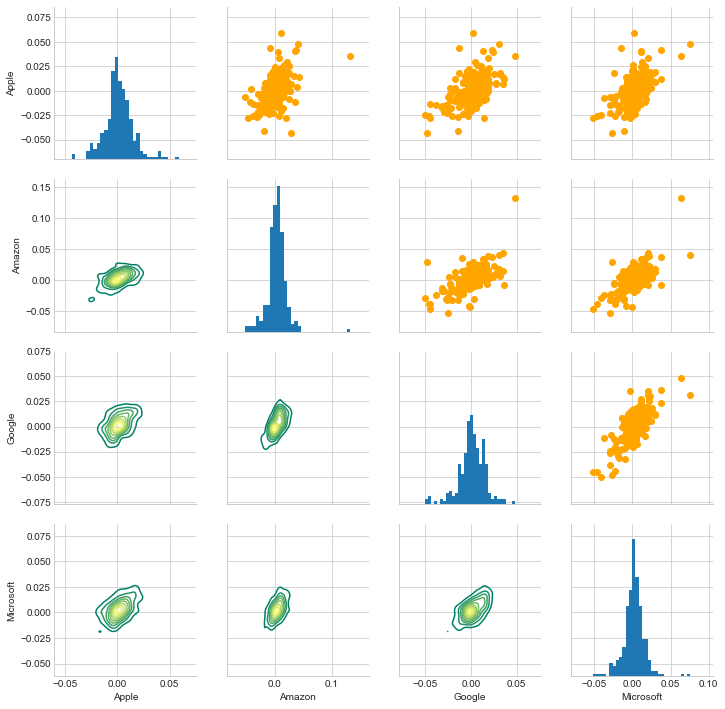

In [252]:
# We can even control what information we see on upper end, lower end and diagonal

returns_fig = sns.PairGrid(st_ret.dropna())

returns_fig.map_upper(plt.scatter,color='orange')

returns_fig.map_lower(sns.kdeplot,cmap='summer')

returns_fig.map_diag(plt.hist, bins=30)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:960: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


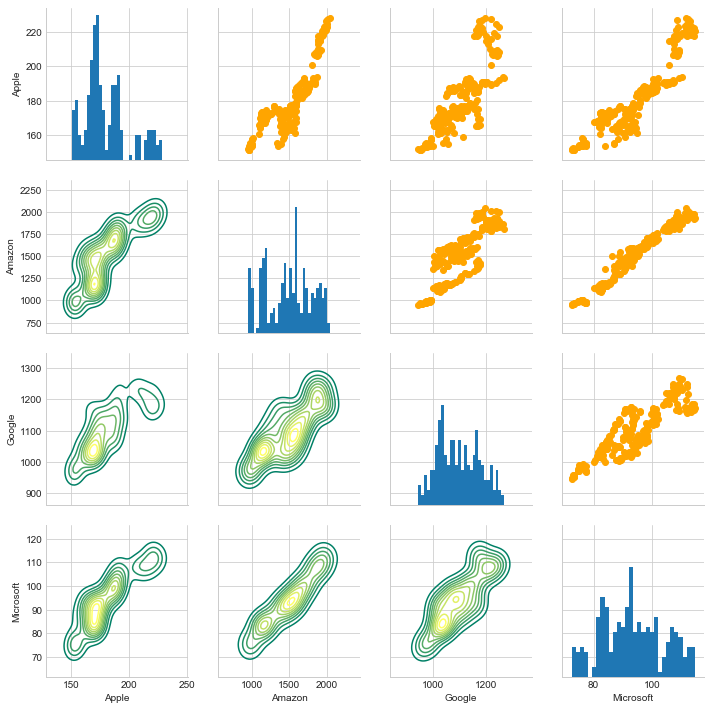

In [253]:
returns_fig1 = sns.PairGrid(closing_df.dropna())

returns_fig1.map_upper(plt.scatter,color='orange')

returns_fig1.map_lower(sns.kdeplot,cmap='summer')

returns_fig1.map_diag(plt.hist, bins=30)

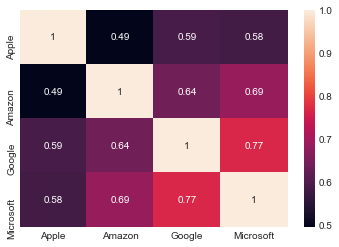

In [255]:
# To get the actual values of the correlation
sns.heatmap(data = st_ret.dropna().corr(), annot=True)

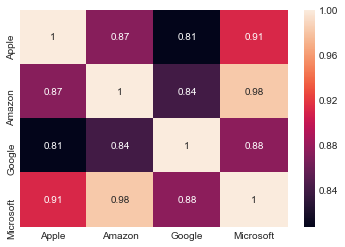

In [256]:
sns.heatmap(data = closing_df.dropna().corr(), annot=True)

# All the stocks have really storng correlation

In [261]:
returns_df = st_ret.dropna()

In [263]:
returns_df.head()

,Apple,Amazon,Google,Microsoft
date,,,,
2017-09-28,-0.006159,0.005816,0.005304,0.000270
2017-09-29,0.005480,0.005176,0.010121,0.008394
2017-10-02,-0.002012,-0.002247,-0.006089,0.001610
2017-10-03,0.004356,-0.002179,0.004742,-0.004691
2017-10-04,-0.006473,0.008724,-0.006379,0.005791


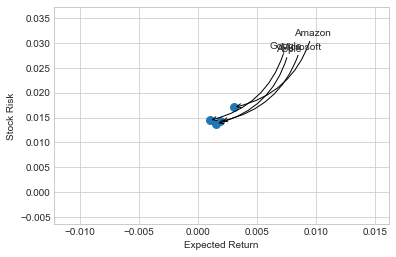

In [300]:
# To check how risky the stock is, we do the following
# Since we need one point we have to calculate the mean value of the returns
# Risk can be determined using standard deviation in the returns

area = np.pi*20

plt.scatter(returns_df.mean(), returns_df.std(), s=area)

plt.xlabel('Expected Return')
plt.ylabel('Stock Risk')

for label, x, y in zip(returns_df.columns, returns_df.mean(), returns_df.std()):
    plt.annotate(
        label,
        xy=(x, y), xytext = (60,70),
        textcoords = 'offset points', ha = 'left', va = 'bottom',
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3, rad=-0.3'))

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


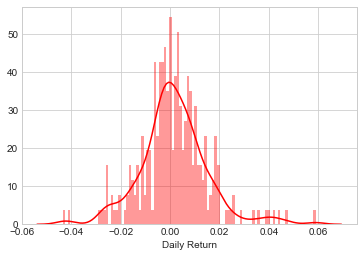

In [311]:
# To calculate value at risk we will use the bootstrap method and montecarlo method
# We previously called ## AAPL['Daily Return'] = AAPL['close'].pct_change() ## to creater daily return column

sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color= 'red')

In [312]:
returns_df.head()

,Apple,Amazon,Google,Microsoft
date,,,,
2017-09-28,-0.006159,0.005816,0.005304,0.000270
2017-09-29,0.005480,0.005176,0.010121,0.008394
2017-10-02,-0.002012,-0.002247,-0.006089,0.001610
2017-10-03,0.004356,-0.002179,0.004742,-0.004691
2017-10-04,-0.006473,0.008724,-0.006379,0.005791


In [320]:
# Now we will find the quantile 
# The emperical quantile we will use here is 0.05. 
# This means that with 95% confidence, our worst daily loss would be the "value above" * 100 percent
# On a 100USD investment we will loose 2.1, 2.6, 2.4 and 2.2 for each of these companies respectively
# 95% of the times, our worst daily loss will not exceed the resulting percentage

In [340]:
quant_95 = DataFrame({'Apple': round(returns_df['Apple'].quantile(0.05),3), 
                      'Amazon': round(returns_df['Amazon'].quantile(0.05), 3), 
                      'Google': round(returns_df['Google'].quantile(0.05), 3),
                      'Microsoft': round(returns_df['Microsoft'].quantile(0.05), 3)},
                      index=['95% Confidence Interval'])

In [341]:
quant_95

,Apple,Amazon,Google,Microsoft
95% Confidence Interval,-0.021,-0.026,-0.024,-0.022


In [343]:
# Montecarlo method
# Muu is just a mean of returns per day
# Sigma is the standard deviation calculated on returns per day

days = 365

dt = 1/days

mu = returns_df.mean()['Google']

sigma = returns_df.std()['Google']

In [345]:
# We need 3 variables here price, shock and drift. By applying np.zero we create a list with 365 zero values
# If we dont create this list with values then we can not make changes to the list
# When the range loop is run, values of shock, drift and price are updated for every day

def stock_monte_carlo(start_price, days, mu, sigma):
    
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1, days):
        
        shock[x] = np.random.normal(loc=mu*dt, scale= sigma*np.sqrt(dt))
        
        drift[x] = mu * dt
        
        price[x] = price[x-1] + price[x-1] * (drift[x] + shock[x])
        
    return price

In [346]:
GOOG.head()

,open,high,low,close,volume
date,,,,,
2017-09-27,927.74,949.9000,927.74,944.49,2239441
2017-09-28,941.36,950.6900,940.55,949.50,1020312
2017-09-29,952.00,959.7864,951.51,959.11,1580994
2017-10-02,959.98,962.5400,947.84,953.27,1283444
2017-10-03,954.00,958.0000,949.14,957.79,888346


Text(0.5,1,'Monte Carlo Analysis (Google)')

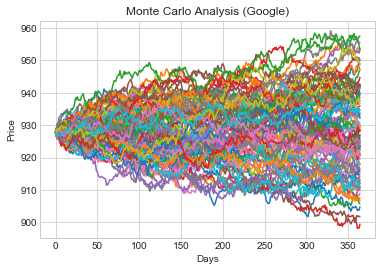

In [351]:
start_price = GOOG.iloc[0,[0]]

for run in range(100):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis (Google)')

In [360]:
# Here the only value that we need from each simulation is the last one, thats why [days-1]
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

Text(0.5,1,'Final price distribution for Google Stock after 365 days')

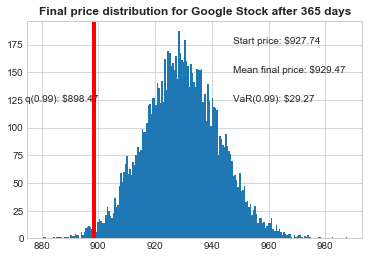

In [371]:
# By specifying 1 in the below line we mean that 99 percent of the value should fit within our output 
q = np.percentile(simulations,1)

plt.hist(simulations, bins = 200)

#Starting price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)

#Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" %simulations.mean())

#Variance of price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q))

#Display 1% quantile
plt.figtext(0.12,0.6, "q(0.99): $%.2f" %q)

#Plot line at 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

#Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold')

In [358]:
# The likelihood of stock price going up isn't much
# The value at risk for each google stock is $29.27
# Given the interval, 99% of the time the amount of money we can loose at most is $29.27
# q is basically start price = variance